In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#shape of train data
x_train.shape

(60000, 28, 28)

8


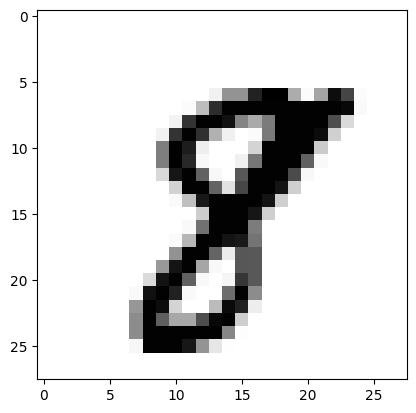

In [2]:
import matplotlib.pyplot as plt

image_index = 55
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys') #preview an element of the data

In [3]:
#Reshaping and preprocessing
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #convolution
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer
model.add(Flatten()) #flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu)) #dense layer relu
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) #dense layer softmax

In [91]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 30s 15ms/step - loss: 0.0105 - accuracy: 0.9968
Epoch 2/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0098 - accuracy: 0.9971
Epoch 3/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0090 - accuracy: 0.9973
Epoch 4/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0098 - accuracy: 0.9971
Epoch 5/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 6/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0102 - accuracy: 0.9971
Epoch 7/25
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0105 - accuracy: 0.9969
Epoch 8/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0085 - accuracy: 0.9974
Epoch 9/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 10/25
1875/1875 [==============================] - 28s 15m

In [92]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2074 - accuracy: 0.9830


[0.20742592215538025, 0.9829999804496765]

1/1 [==============================] - 0s 129ms/step
4


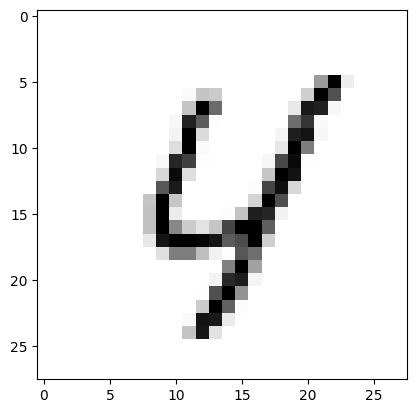

In [93]:
#testing on test data
image_index = 555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

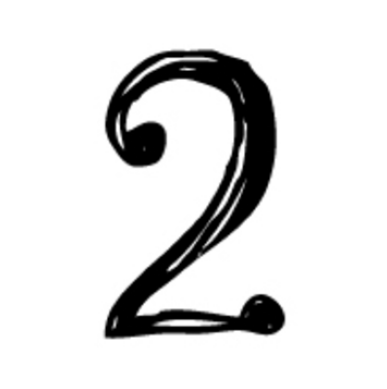

In [118]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale for prediction
im = cv2.imread("number.PNG")
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [119]:
from tensorflow.keras.preprocessing import image
#Image preprocesing
img = image.load_img("number.PNG", target_size=(28, 28),color_mode="grayscale")
img_array = image.img_to_array(img)

In [120]:
img_array.shape

(28, 28, 1)

In [121]:
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

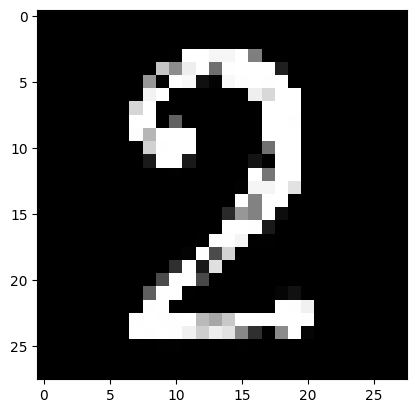

In [122]:
plt.imshow(img_array,cmap="Greys")

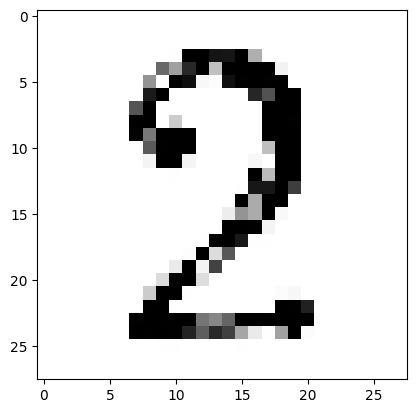

In [123]:
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

1/1 [==============================] - 0s 86ms/step
2


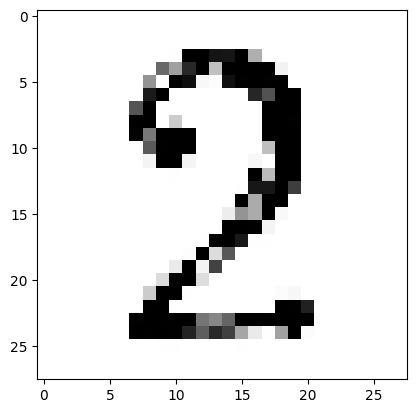

In [125]:
#Running prediction on the image
plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())